# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import warnings;
warnings.filterwarnings('ignore');

# Load dataset

In [2]:
df = pd.read_csv('QualityPrediction.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking Null Values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking Correlation

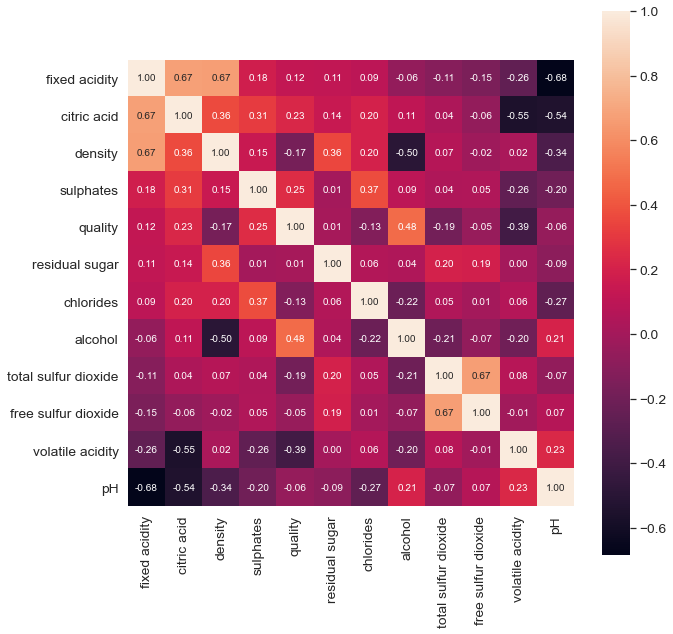

In [6]:
plt.figure(figsize=[10,10])
corrmat = df.corr()
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k,'fixed acidity')['fixed acidity'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Data Pre-processing

In [7]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Visualization

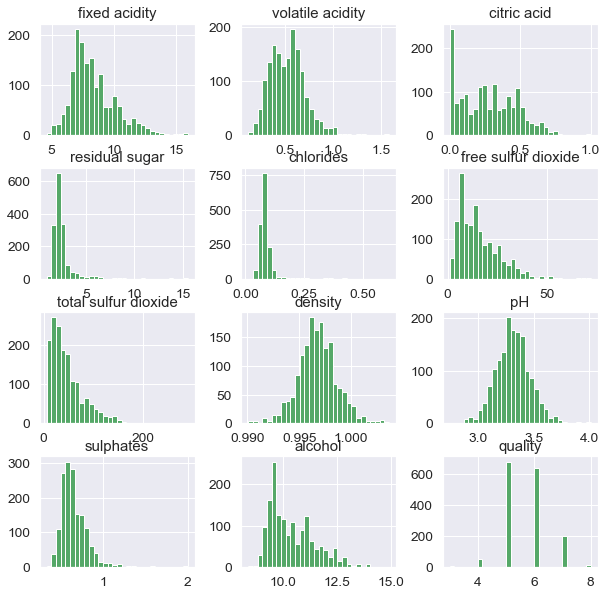

In [8]:
df.hist(bins=30,figsize=(10,10),color = 'g')
plt.show()

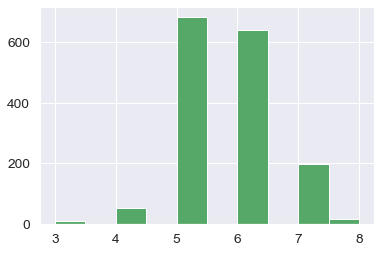

In [9]:
plt.hist(df["quality"],color='g')
plt.show()

Text(0, 0.5, 'alcohol')

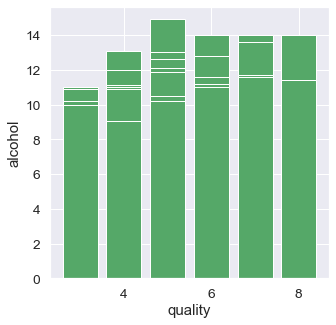

In [10]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['alcohol'],color='g')
plt.xlabel('quality')
plt.ylabel('alcohol')

In [11]:
df["quality"].groupby(df["quality"]).count()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

# Dependent Variable is converted into Good and Bad based on quality

In [12]:
df["good_quality"] = [0 if i<7 else 1 for i in df["quality"]]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
df["good_quality"].groupby(df["good_quality"]).count()

good_quality
0    1382
1     217
Name: good_quality, dtype: int64

In [14]:
y = df["good_quality"]
X = df.drop(["good_quality", "quality"], axis=1)

Normalizing feature

In [15]:
scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# Splitting Data into Train and Test set

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)

(1199, 11)


# Building Decision Tree Model

# Decision Tree with CART(GINI)

# Decision Tree with Depth 2

In [17]:
model_dt_2 = DecisionTreeClassifier(random_state=1,max_depth=2)

model_dt_2.fit(X_train,y_train)

model_dt_2_score_train = model_dt_2.score(X_train,y_train)

model_dt_2_score_test = model_dt_2.score(X_test,y_test)

print('Training Score',model_dt_2_score_train)

print('Testing Score',model_dt_2_score_test)

Training Score 0.8798999165971643
Testing Score 0.9075


# Decision Tree with Depth 4

In [18]:
model_dt_4 = DecisionTreeClassifier(random_state=1,max_depth=4)

model_dt_4.fit(X_train,y_train)

model_dt_4_score_train = model_dt_4.score(X_train,y_train)

model_dt_4_score_test = model_dt_4.score(X_test,y_test)

print('Training Score',model_dt_4_score_train)

print('Testing Score',model_dt_4_score_test)

Training Score 0.9040867389491243
Testing Score 0.9025


# Decision Tree with Depth 6

In [19]:
model_dt_6 = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt_6.fit(X_train,y_train)

model_dt_6_score_train = model_dt_6.score(X_train,y_train)

model_dt_6_score_test = model_dt_6.score(X_test,y_test)

print('Training Score',model_dt_6_score_train)

print('Testing Score',model_dt_6_score_test)

Training Score 0.9482902418682235
Testing Score 0.9125


# Decision Tree with Depth 8

In [20]:
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)

model_dt_8.fit(X_train,y_train)

model_dt_8_score_train = model_dt_8.score(X_train,y_train)

model_dt_8_score_test = model_dt_8.score(X_test,y_test)

print('Training Score',model_dt_8_score_train)

print('Testing Score',model_dt_8_score_test)

Training Score 0.9791492910758965
Testing Score 0.9075


# Decision Tree with c4.5 (Entropy)

In [21]:
model_dt = DecisionTreeClassifier(max_depth=2,criterion='entropy')

model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict_proba(X_test)[:,1]

model_dt_score_train = model_dt.score(X_train,y_train)
print(model_dt_score_train)

model_dt_score_test = model_dt.score(X_test,y_test)
print(model_dt_score_test)

0.8565471226021685
0.8875


# Graphical Representation of Tree

In [22]:
from io import StringIO
# from sklearn.externals.six import StringIO

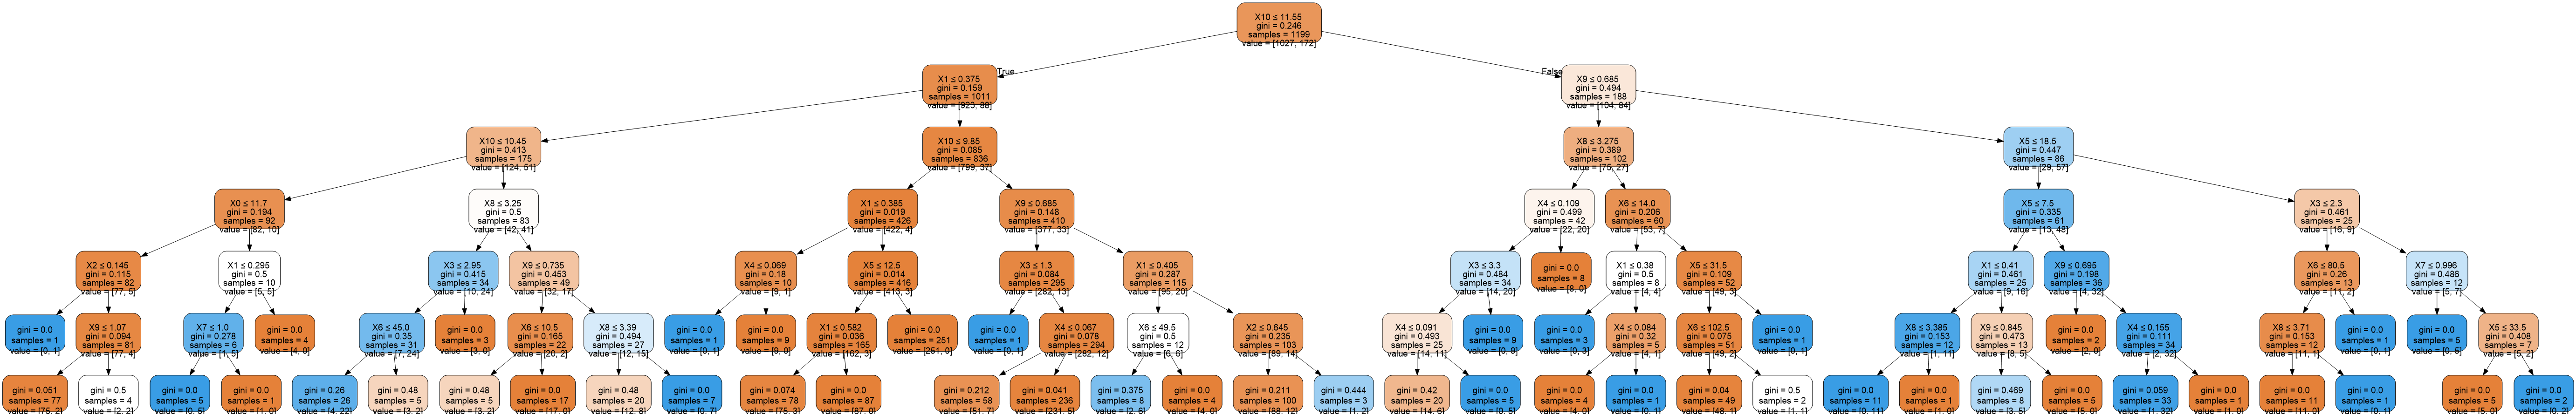

<Figure size 720x576 with 0 Axes>

In [23]:
plt.figure(figsize=(10,8))
dot_data = StringIO()
export_graphviz(model_dt_6,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [24]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       355
           1       0.55      0.71      0.62        45

    accuracy                           0.90       400
   macro avg       0.76      0.82      0.78       400
weighted avg       0.92      0.90      0.91       400



# Model building and getting Confidence score

In [25]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
confidence = clf.score(X_test, y_test)
print("The confidence score: ",confidence)

The confidence score:  0.9075


Predicting Forecast

In [27]:
y_pred = clf.predict(X_test)

In [28]:
results_series = {"actual":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
print("First 5 rows of results")
results.head()

First 5 rows of results


,actual,predicted
1109,0,0
1032,0,0
1002,1,1
487,0,0
979,0,0


# Area under the Curve(AUC)

In [29]:
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

predictions = model_dt_6.predict(X_test)
# print(predictions)

print(model_dt_6.score(X_test,y_test))
y_actual_result = y_test
# print(y_actual_result)

0.9125


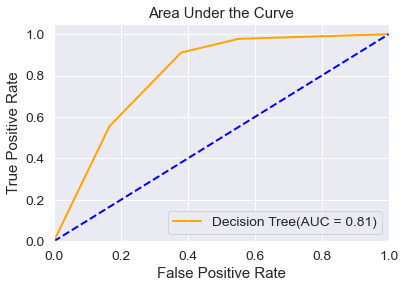

In [30]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

# Confusion Matrix

In [31]:
print(confusion_matrix(y_test,predictions))

[[337  18]
 [ 17  28]]


In [32]:
accuracy_score(y_test,predictions)

0.9125

In [33]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

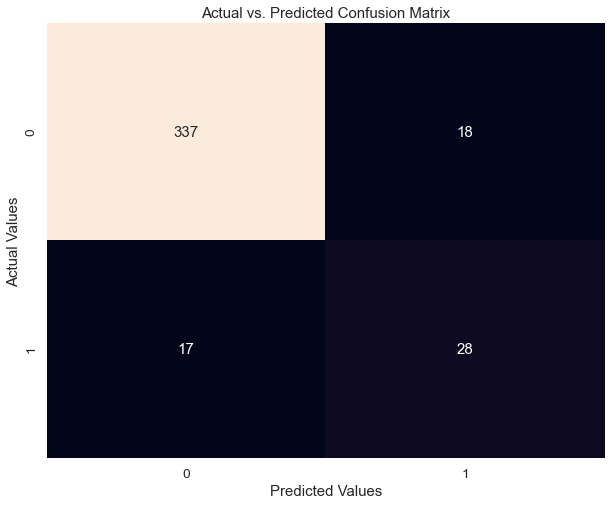

In [34]:
plt.figure(figsize=(10,8))
conf_mat = create_conf_mat(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [35]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,normalize=False):
    cm = confusion_matrix(y_test,model,labels=[0,1])
    classes = ["Success","Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matix"
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

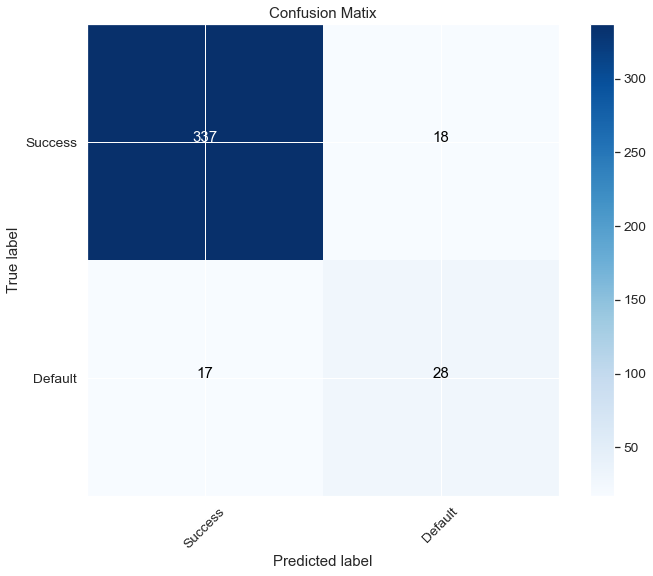

In [36]:
plt.figure(figsize=(10,8))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Analyse Feature Importance

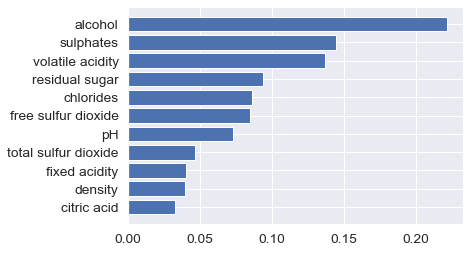

In [37]:
s = {'col1':X.columns, 'col2':clf.feature_importances_}
df = pd.DataFrame(s)
df_sorted = df.sort_values('col2')
plt.barh(df_sorted["col1"], df_sorted["col2"])
plt.show()